<img src="Logo.png" width="100" align="left"/> 

# <center> Unit 3 Project </center>
#  <center> First section : Data cleaning  </center>

In this notebook you will be cleaning your dataset and making sure it's fully ready for modeling.

The used dataset is [Hepatitis C  dataset](https://www.kaggle.com/fedesoriano/hepatitis-c-dataset)

## Data preparation 
As a first step we need to prepare the data :

1. Read the data set as a data frame ( file name is HepatitisCdata.csv) 
2. The here are the column of your dataset:
    1) X (Patient ID/No.)
    2) Category (diagnosis) (values: '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis') ( the target ) 
    3) Age (in years)
    4) Sex (f,m)
    Attributes 5 to 14 refer to laboratory data:
    5) ALB : Albumin Blood Test
    6) ALP : Alkaline phosphatase
    7) ALT : Alanine Transaminase
    8) AST : Aspartate Transaminase
    9) BIL : Bilirubin
    10) CHE : Acetylcholinesterase
    11) CHOL : Cholesterol
    12) CREA : Creatinine 
    13) GGT : Gamma-Glutamyl Transferase
    14) PROT : Proteins
    
3. Remember your model only accepts numbers so make sure you deal properly with the missing values and the data types and justify your solution choices 
 
4. Make sure the dataset shape in the end is : rows 615 and  14 columns 
 
5. Once finished save the cleaned dataset as "clean_HepatitisC.csv" file 
 

In [17]:
import pandas as pd 
import numpy as np 
import kagglehub

In [34]:
#To-Do: read the dataset 
data = pd.read_csv('../../datasets/HepatitisCdata.csv')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [37]:
#To-Do  Start investigating the data types and correcting that 
# Provide explanation about each step in Markdown cells 
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


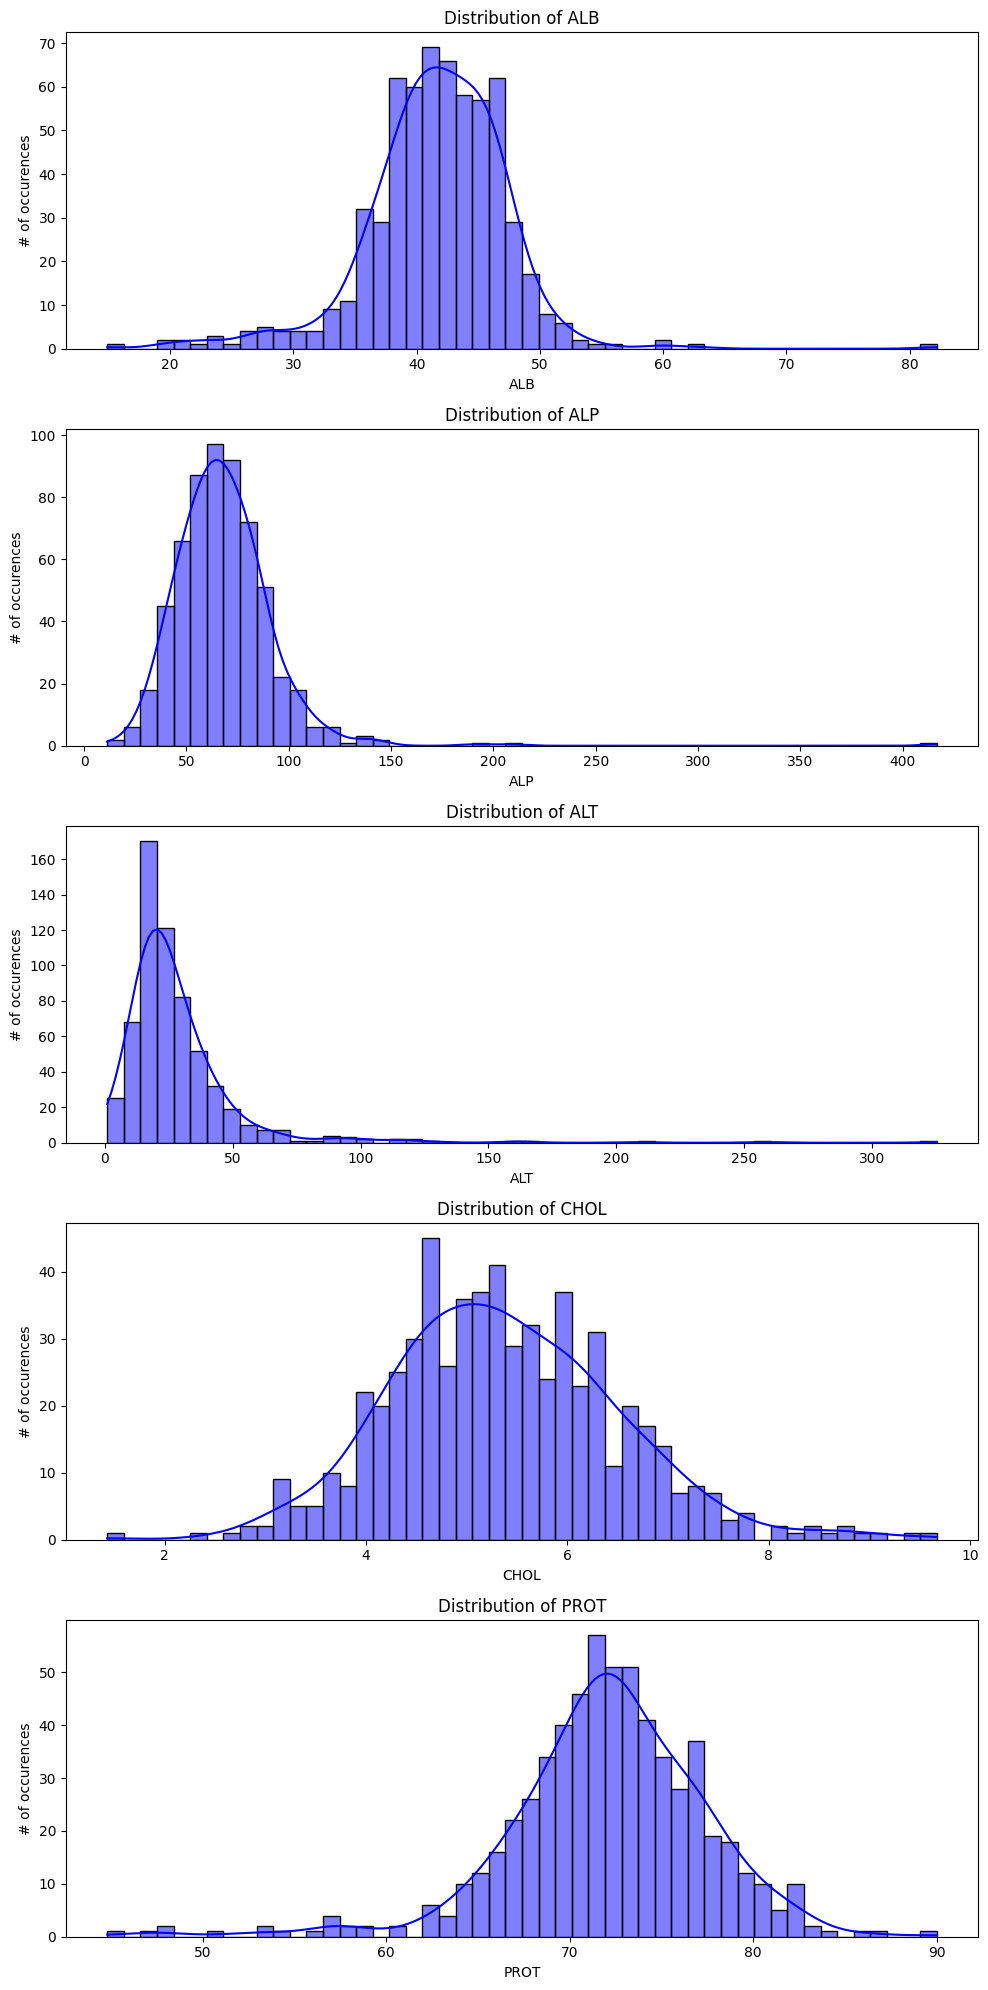

In [38]:
###Checking the distribution of the columns with missing values to see how to best deal with the missing values. 
#As the goal is to return 615 rows, dropping rows with missing values is not an option. So either mean or median
#The distributions for all of the features below show that they are not perfectly normal, so working with the median is the better way here? Not 100% sure. 

import matplotlib.pyplot as plt
import seaborn as sns

# List columns with missing values, based on the data.info seen above. 
missing_columns = ['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']

# Set up the plot grid
fig, axes = plt.subplots(nrows=len(missing_columns), ncols=1, figsize=(10, 20))

# Plot each column's distribution
for i, col in enumerate(missing_columns):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=50, color='blue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('# of occurences')

plt.tight_layout()
plt.show()

> Data types are all numeric Now ! Next we need to deal with missing values for the feature columns 

#To-Do list all the columns that contain missing values along with their counts 

In [39]:
# To-Do Start providing solutions for each column that has missing data 
# Treat each case seperately 
# Hint : no data row should be deleted 
# Provide evidence that you filled those missing values after each step 

for col in missing_columns:
    data[col] = data[col].fillna(data[col].median()) #got a warning about inplace=True planning to be decommissioned 
    print(f'Missing values in {col} after imputation: {data[col].isnull().sum()}')

print(f'Total missing values in dataset: {data.isna().sum()}')

Missing values in ALB after imputation: 0
Missing values in ALP after imputation: 0
Missing values in ALT after imputation: 0
Missing values in CHOL after imputation: 0
Missing values in PROT after imputation: 0
Total missing values in dataset: Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64


> We have no more missing data
As an optional thing we can also rename the first column as 'index' or "ID" instead of Unnamed 

In [40]:
data.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [41]:
data.rename(columns={'Unnamed: 0': "ID"}, inplace=True)

In [42]:
data.columns

Index(['ID', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL',
       'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [45]:
#Label encode non-numeric columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Category'] = label_encoder.fit_transform(data['Category'])


### 6. Save the clean dataset :

In [46]:
# Don't forget to drop the index 
data.to_csv('clean_HepatitisC.csv', index=False)